In [5]:
import pandas as pd
import matplotlib.pyplot as plt
#import scikitplot as skplt
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix, classification_report

Matplotlib is building the font cache; this may take a moment.


In [7]:
df = pd.read_csv("spam.csv",encoding='latin1')

In [8]:
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
#creating the DataFrames

In [10]:
df=df.rename(columns={'v1':'label','v2':'message'})

In [11]:
df=df[['label','message']]

In [12]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df['label'] = df.label.map({'ham' : 0, 'spam' : 1})

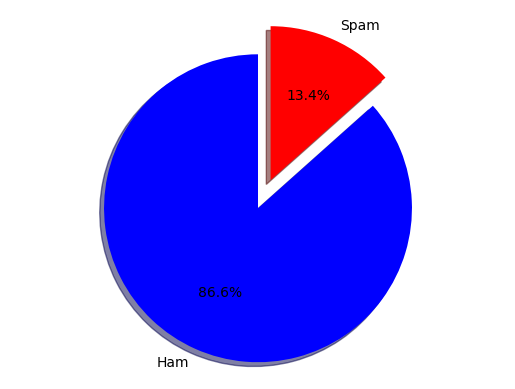

In [14]:
import matplotlib.pyplot as plt

count_Class = df['label'].value_counts()

# Data to Plot
labels = ['Ham', 'Spam']
sizes = [count_Class[0], count_Class[1]]
colors = ['blue', 'red']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [15]:
print(count_Class.to_dict())

{0: 4825, 1: 747}


In [16]:
#spliting the data into test and train sets

X_train, X_test, y_train, y_test = tts(df['message'], df['label'], test_size=0.2, random_state=1)

In [17]:
#vectorizing the data


count_vector = CountVectorizer()
train_data = count_vector.fit_transform(X_train)
test_data = count_vector.transform(X_test)



In [18]:
#Naïve Bayes classifier for multinomial models


Mnb = MultinomialNB()
Mnb.fit(train_data, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [19]:
#Now we predict

MnbPredicts = Mnb.predict(test_data)

In [20]:
#To inspect our trained model's accuracy, precision, and recall, we use sklearn.metrics.


print("The accuracy of our Naïve Bayes multinomial model is {} %".format(accuracy_score(y_test, MnbPredicts) * 100))
print("The Precision of our Naïve Bayes multinomial model is {} %". format(precision_score(y_test, MnbPredicts)* 100))
print("The Recall of our Naïve Bayes multinomial model is {} %" . format(recall_score(y_test, MnbPredicts)* 100))


The accuracy of our Naïve Bayes multinomial model is 98.47533632286995 %
The Precision of our Naïve Bayes multinomial model is 94.20289855072464 %
The Recall of our Naïve Bayes multinomial model is 93.5251798561151 %


Accuracy: 98.48%


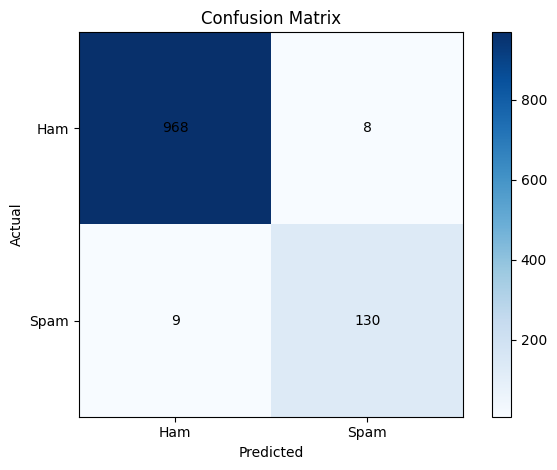

In [21]:
#We use the confusion matrix to observe the performance of our model.

from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, MnbPredicts)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, MnbPredicts) * 100))

# Plot the confusion matrix using matplotlib only
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Ham', 'Spam'])
plt.yticks(tick_marks, ['Ham', 'Spam'])

# Add text annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, cm[i][j], ha='center', va='center', color='black')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [22]:
#Now we want to test our model mbn with a new Sms/Email massage
#If the output is 0, it means that the input message is not spam, and if it is 1, it means that message has been spam.



new_test_sample_ham = ["Hi,sravani and I am glad to share the program that I've written with everyone."]
new_test_sample_spam= ["Congratulations, you've won a free Sony camera."]
new_test_sample_ham_vectorized = count_vector.transform(new_test_sample_ham)
new_test_sample_spam_vectorized = count_vector.transform(new_test_sample_spam)

In [23]:
sample_predict = Mnb.predict(new_test_sample_ham_vectorized)
sample_predict

array([0])

In [24]:
sample_predict = Mnb.predict(new_test_sample_ham_vectorized)
sample_predict

array([0])

In [25]:
import joblib
#save model
joblib.dump( Mnb,'spam_model.pkl')
#save vectorizer
joblib.dump(count_vector,'vectorizer.pkl')

['vectorizer.pkl']